In [ ]:
%matplotlib inline
import os
import numpy as np
import scipy.io as sio
import scipy as sp
import pickle 
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_pickle('feats.pkl')
X = data.drop(columns=['labels']).to_numpy()
labels = data['labels'].to_numpy()

## Se parte la matriz de características en entrenamiento y test

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X,labels,test_size = 0.3, random_state=50) 

## Se normalizan las características

In [ ]:
#estandarización de la matriz de entrenamiento
mXtrain = np.mean(X_train,axis= 0)
sXtrain = np.std(X_train,axis= 0)    
X_train_norm = (X_train-mXtrain)/sXtrain

#estandarización de la matriz de test
X_test_norm = (X_test-mXtrain)/sXtrain

## Se entrega el modelo y se transformanlos datos para diferentes configuraciones de q

In [ ]:
from sklearn.decomposition import PCA
Q = np.arange(1, X_train_norm.shape[1], 2)
Q=np.append(Q,213)

pca_train = []
pca_test = []

for q in Q: 
  pca = PCA(n_components=q)
  X_train_pca = pca.fit_transform(X_train_norm)
  X_test_pca = pca.transform(X_test_norm)
  pca_train.append(X_train_pca)
  pca_test.append(X_test_pca)

#pca_train.append(X_train_norm)
#pca_test.append(X_test_norm)


## Se entrena el clasificador bayesiano

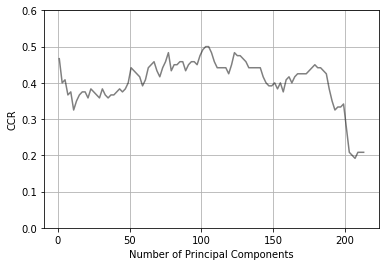

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn import svm

Acc=[]
for i in range(len(pca_train)): 
  # Se crea el modelo (ej. clasificador)
  clf = GaussianNB()
  # Se entrena el modelo
  clf.fit(pca_train[i],y_train)
  # Se realiza una predicción
  Acc.append(accuracy_score(y_test,clf.predict(pca_test[i])))

plt.figure()
plt.plot(Q,Acc,color='k',alpha=0.5)
plt.xlabel("Number of Principal Components")
plt.ylabel("CCR")
plt.ylim([0,0.6])
plt.grid()
plt.show()

Se calcula la tasa de acierto para la matriz de test de entrada normalizada

In [ ]:
print('Accuracy: ', accuracy_score(y_test,clf.predict(X_test_norm)))

Accuracy:  0.11666666666666667


## Se entrena el regresor logístico

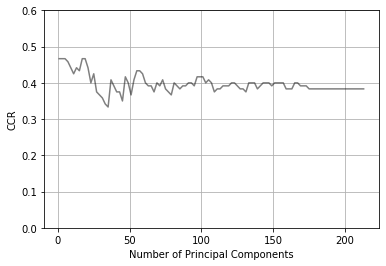

In [ ]:
from sklearn.linear_model import LogisticRegression

Acc=[]
for i in range(len(pca_train)): 
  # Se crea el modelo (ej. clasificador)
  model = LogisticRegression(solver='newton-cg')
  # Se entrena el modelo
  model.fit(pca_train[i],y_train)
  # Se realiza una predicción
  Acc.append(accuracy_score(y_test,model.predict(pca_test[i])))

plt.figure()
plt.plot(Q,Acc,color='k',alpha=0.5)
plt.xlabel("Number of Principal Components")
plt.ylabel("CCR")
plt.ylim([0,0.6])
plt.grid()
plt.show()


Se calcula la tasa de acierto para la matriz de test de entrada normalizada

In [ ]:
print('Accuracy: ', accuracy_score(y_test,model.predict(X_test_norm)))

Accuracy:  0.2
